In [1]:
'''Generate Samples'''
import pandas as pd
from gensamples import StraightIsingSamplesGenerator

# create an object
num_nodes = 2
num_edges = num_nodes - 1
num_samples = 10

straight_ising_generator = StraightIsingSamplesGenerator(num_nodes, num_edges)

# get samples
samples = straight_ising_generator.sample_generator(num_samples)

# Convert samples to a pandas DataFrame
samples_df = pd.DataFrame([{**{
    f"edge_{i}-{i+1}": weights[i] for i in range(len(weights))
}, **{
    f"spin_{i}": spins[i] for i in range(len(spins))
}, "hamiltonian": hamiltonian} for sample in samples for weights, spins, hamiltonian in [(sample["edge_weights"], sample["spins"], sample["hamiltonian"])]])

# # Save the DataFrame to a CSV file
# samples_df.to_csv("1d_straight_ising_model_samples.csv", index=False)


In [2]:
samples_df.head()


,edge_0-1,spin_0,spin_1,hamiltonian
0,-0.493740,-1,1,-0.493740
1,-0.439572,1,-1,-0.439572
2,0.448356,-1,-1,-0.448356
3,0.665288,-1,-1,-0.665288
4,0.239434,1,1,-0.239434


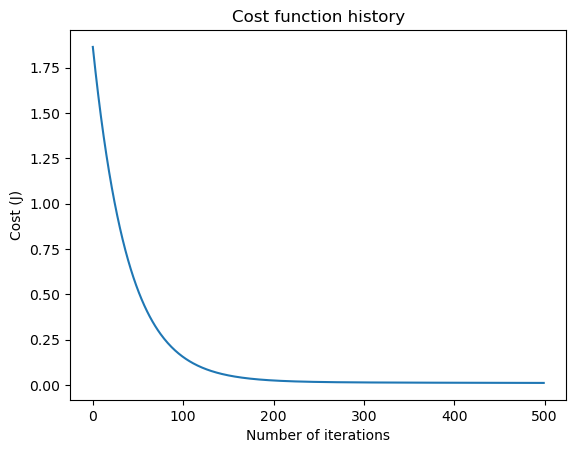

In [3]:
import numpy as np
import linear_regression
from linear_regression import LinearRegressor


data = samples_df
X = data.iloc[:,0:num_edges]
y = data['hamiltonian']

X_feat = linear_regression.featurization(X)

linear_regressor = LinearRegressor(X_feat,y)

lr=0.01
num_iters=500

theta, J_hist = linear_regressor.gradient_descent(num_iters, lr)


import matplotlib.pyplot as plt
# Plot cost function history
plt.plot(range(num_iters), J_hist)
plt.xlabel("Number of iterations")
plt.ylabel("Cost (J)")
plt.title("Cost function history")
plt.show()



In [4]:
from linear_regressor_handcrafted import LinearRegressor, featurization

data = samples_df
X = data.iloc[:, 0:num_edges]
y = data['hamiltonian']

X_feat = featurization(X)  # Direct use of the function
model = LinearRegressor(X_feat, y)


ModuleNotFoundError: No module named 'linear_regressor_handcrafted'